In [7]:
%matplotlib inline
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import xspec
import pyxspec_tools as pt

In [2]:
plt.style.use('seaborn-notebook')

In [52]:
s = xspec.AllData("combined_srcspec_rgss.ds")

In [53]:
m = xspec.Model("tbabs(powerlaw+atable{xout_aout.fits})")

In [54]:
def showmodel(m):
    """Display current model information
    
        Display a formated view of current model information
        such as the one produced by `model.show()` on pyXspec
        or by `show par` on Xspec.
        The errors are taken from the `xspec.Fit.error` calculation
        if that was not performed errros will be zero.
    """
    print("Model: {}".format(m.expression))
    print()
    print("{:4} {:4} {:12} {:10} {:7} {:15} {:12}".format("P#", "C#", "Component",
                                                         "Parameter", "Unit", "Value",
                                                         "Errors"))
    print("--"*38)
    pid = 1
    for cid, component in enumerate(m.componentNames):
        #print("component: m.{}".format(component))
        for parameter in eval("m.{}.parameterNames".format(component)):
            #print("parameter: m.{}.{}".format(component, parameter))
            u = eval("m.{}.{}.unit".format(component, parameter))
            val = eval("m.{}.{}.values[0]".format(component, parameter))
            err = eval("m.{}.{}.error[:2]".format(component, parameter))
            print("{:<4} {:<4} {:<12} {:<10} {:<7} {:<10.5e} ({:<10.5e}, {:<10.5e})".format(pid, cid+1,
                                                  component,
                                                  parameter,
                                                  u,
                                                  val,
                                                  err[0], err[1]))
            pid+=1

In [55]:
m.show()

In [56]:
pt.printmodel(m)

Model: TBabs(powerlaw + atable{xout_aout.fits})
()
P#   C#   Component    Parameter  Unit    Value           Errors      
----------------------------------------------------------------------------
1    1    TBabs        nH         10^22   1.0        (0.0       , 0.0       )
2    2    powerlaw     PhoIndex           1.0        (0.0       , 0.0       )
3    2    powerlaw     norm               1.0        (0.0       , 0.0       )
4    3    mymodel      column             1e+22      (0.0       , 0.0       )
5    3    mymodel      rlogxi             1.75       (0.0       , 0.0       )
6    3    mymodel      z                  0.0        (0.0       , 0.0       )
7    3    mymodel      norm               1.0        (0.0       , 0.0       )


In [29]:
xspec.Plot("data")

In [40]:
def plot(plot_str, xaxis='keV', xlims=None, ylims=None):
    xspec.Plot.device = ""
    xspec.Plot(plot_str)
    xspec.Plot.xAxis = xaxis
    x = np.asarray(xspec.Plot.x())
    xerr = np.asarray(xspec.Plot.xErr())
    y = np.asarray(xspec.Plot.y())
    yerr = np.asarray(xspec.Plot.yErr())
    try:
        m = np.asarray(xspec.Plot.model())
        mavailable=True
    except:
        mavailable=False
        
    plt.cla()
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='+', c='k')
    if mavailable:
        plt.plot(x, m, linestyle='steps-mid', c='r')
    if xlims is not None:
         plt.xlim(xlims[0], xlims[1])
    if ylims is not None:
         plt.ylim(ylims[0], ylims[1])
    plt.show()

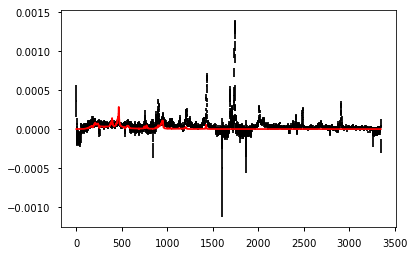

In [41]:
plot('data')

In [57]:
xspec.Fit.renorm()

In [59]:
xspec.Fit.perform()

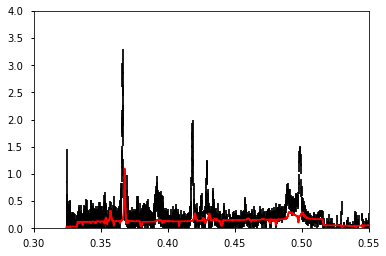

In [61]:
plot('data', xlims=(0.3,0.55), ylims=(-0.001, 4))